----------------------------------------------------------------------------------------------------------------
For parameter A        :     $     86.08657_{-     0.00616}^{+   0.00737} $
For parameter w        :     $      0.00636 \pm      0.00000 $
For parameter phi      :     $    -13.06097_{-     0.00006}^{+   0.00008} $
For parameter c        :     $     20.40236 \pm      0.00438 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min      820065.61827414
Reduced χ² value       :     χ²_red         335.54239700
P-value                :     p-value          0.00000000
----------------------------------------------------------------------------------------------------------------



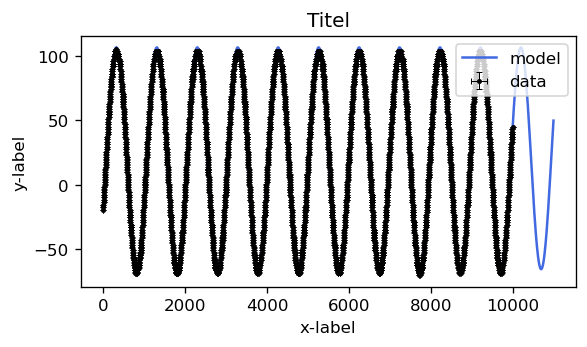

In [19]:
import fit_classes as fp
import numpy as np
import os

errors = []
ERROR = 0.1 # Error in mV

class DataPlus(fp.Data):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        def sinus_model(params, x):
            A,w,phi,c = params
            return A*np.sin(w*x + phi) + c
        try:
            self.fit = self.fit(sinus_model, initial_guess=(200, 0.006, -10, 25))
        except ValueError as e:
            errors.append(self.name)

        self.A, self.w, self.phi, self.c = self.fit.minima

def data_from_file(file):
    file_path = os.path.join(os.path.dirname(os.path.abspath(os.getcwd())), file)
    data = np.genfromtxt(file_path, delimiter=",", skip_header=9)
    x = data[:, 0].astype(int)
    y = data[:, 1]
    mask = np.concatenate(([True], y[1:] != y[:-1]))
    x = x[mask]
    y = y[mask]

    dy = ERROR*np.ones_like(y)
    return DataPlus(x, y, dy, name=file_path)
        
def get_lowest_folders(root):
    lowest_folders = []
    for dirpath, dirnames, filenames in os.walk(root):
        if not dirnames:
            lowest_folders.append(dirpath)
    return lowest_folders

def load_data_by_folder(root):
    folder_data = {}
    total_files = 0
    for folder in get_lowest_folders(root):
        total_files += len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])

    current_file = 0
    for folder in get_lowest_folders(root):
        folder_name = os.path.basename(folder)
        data_list = []
        for file in os.listdir(folder):
            file_path = os.path.join(folder, file)
            if os.path.isfile(file_path):
                current_file += 1
                # os.system(f'echo "File: {current_file:>3}/{total_files}"')
                data_list.append(data_from_file(file_path))
        
        if data_list:
            folder_data[folder_name] = np.array(data_list)
    return folder_data

data_arrays = load_data_by_folder(os.path.join(os.path.abspath(os.getcwd()), "data"))

for error in errors:
    display(f'ERROR: "{error}"')

# print(data_arrays['opgave1'][0].show())
print(f"{data_arrays['opgave1'][0].fit}")
# print(f"{data_arrays['opgave1'][0].A}")
# print(f"{data_arrays['opgave1'][0].w}")
data_arrays['opgave1'][0].fit.show(size=2)


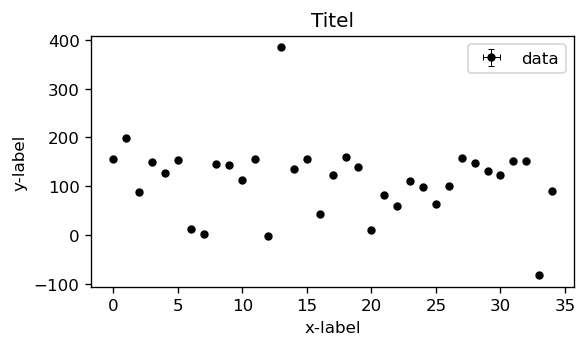

In [82]:
file = 'opgave2_3'
x = [i for i in range(len(data_arrays[file]))]
y = [data_arrays[file][i].A for i in range(len(data_arrays[file]))]
dy = np.zeros_like(y)
opgave2_1_A = fp.Data(x, y, dy)
opgave2_1_A.show()
# for i in range(len(data_arrays[file])):
#     print(data_arrays[file][i].A)